# Análisis Exploratorio de Datos - Supply Chain

## Objetivo del análisis

El objetivo principal de este análisis exploratorio es comprender el comportamiento de la cadena de suministro de una startup del sector de belleza y cosmética. A través de la exploración de datos, buscamos identificar patrones, oportunidades de mejora y posibles cuellos de botella en áreas como:

- Tipos de productos y su rendimiento en ventas e ingresos.
- Proveedores más eficientes en términos de calidad, costos y tiempos.
- Rutas y modos de transporte que optimicen la logística.
- Análisis de defectos y costos asociados.

Este análisis servirá como base para decisiones estratégicas y desarrollo de soluciones analíticas futuras (modelado predictivo, dashboards, etc.).

---

## Breve descripción del dataset

El conjunto de datos proviene de la cadena de suministro de una startup de maquillaje, con un total de **100 registros** y **24 columnas**, que representan información operacional clave. Las variables incluyen:

- **Productos**: tipo, SKU, precio, disponibilidad y stock.
- **Ventas**: número de unidades vendidas e ingresos generados.
- **Cliente**: características demográficas.
- **Proveedores**: nombre, ubicación, volumen de producción, costos y tiempos de fabricación.
- **Logística**: tiempos de entrega, costos de envío, transportadoras, rutas y modos de transporte.
- **Calidad**: resultados de inspección y tasas de defectos.

El dataset es ideal para evaluar eficiencia logística, rendimiento comercial y control de calidad dentro del proceso de supply chain.

---


In [1]:
# Cargar librerías
library(tidyverse)

#Leer el CSV
df <- read_csv("/kaggle/input/supply-chain-analysis/supply_chain_data.csv")

#Ver la estructura del dataset
glimpse(df)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Rows: 100 Columns: 24


── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (9): Product type, SKU, Customer demographics, Shipping carriers, Suppl...
dbl (15): Price, Availability, Number of products sold, Revenue generated, S...



ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 100
Columns: 24
$ `Product type`            <chr> "haircare", "skincare", "haircare", "skincar…
$ SKU                       <chr> "SKU0", "SKU1", "SKU2", "SKU3", "SKU4", "SKU…
$ Price                     <dbl> 69.808006, 14.843523, 11.319683, 61.163343, …
$ Availability              <dbl> 55, 95, 34, 68, 26, 87, 48, 59, 78, 35, 11, …
$ `Number of products sold` <dbl> 802, 736, 8, 83, 871, 147, 65, 426, 150, 980…
$ `Revenue generated`       <dbl> 8661.997, 7460.900, 9577.750, 7766.836, 2686…
$ `Customer demographics`   <chr> "Non-binary", "Female", "Unknown", "Non-bina…
$ `Stock levels`            <dbl> 58, 53, 1, 23, 5, 90, 11, 93, 5, 14, 51, 46,…
$ `Lead times`              <dbl> 7, 30, 10, 13, 3, 27, 15, 17, 10, 27, 13, 23…
$ `Order quantities`        <dbl> 96, 37, 88, 59, 56, 66, 58, 11, 15, 83, 80, …
$ `Shipping times`          <dbl> 4, 2, 2, 6, 8, 3, 8, 1, 7, 1, 2, 1, 4, 9, 5,…
$ `Shipping carriers`       <chr> "Carrier B", "Carrier A", "Carrier B", "Carr…
$ `Shipping costs`

Conclusiones sobre la estructura del dataset

**Dimensiones**

100 filas y 24 columnas → Es un dataset pequeño pero suficientemente completo para practicar EDA, visualización y modelos básicos.

**Tipos de columnas**

9 columnas tipo chr (texto) → Categorías como producto, ubicación, transportadora, etc.

15 columnas tipo dbl (numérico) → Ideal para análisis estadístico y visualizaciones.

**Posibles observaciones iniciales**

Hay columnas duplicadas en concepto, como Lead times y Lead time (podríamos evaluar si son diferentes o si hay un error).

La columna Customer demographics tiene categorías como "Unknown" y "Non-binary" → Revisaremos valores únicos más adelante.

Inspection results tiene valores tipo "Pending", "Fail" → Buen candidato para análisis de calidad.

In [2]:
# Ver resumen estadístico de columnas numéricas
summary(select(df, where(is.numeric)))

     Price        Availability    Number of products sold Revenue generated
 Min.   : 1.70   Min.   :  1.00   Min.   :  8.0           Min.   :1062     
 1st Qu.:19.60   1st Qu.: 22.75   1st Qu.:184.2           1st Qu.:2813     
 Median :51.24   Median : 43.50   Median :392.5           Median :6006     
 Mean   :49.46   Mean   : 48.40   Mean   :461.0           Mean   :5776     
 3rd Qu.:77.20   3rd Qu.: 75.00   3rd Qu.:704.2           3rd Qu.:8254     
 Max.   :99.17   Max.   :100.00   Max.   :996.0           Max.   :9866     
  Stock levels      Lead times    Order quantities Shipping times 
 Min.   :  0.00   Min.   : 1.00   Min.   : 1.00    Min.   : 1.00  
 1st Qu.: 16.75   1st Qu.: 8.00   1st Qu.:26.00    1st Qu.: 3.75  
 Median : 47.50   Median :17.00   Median :52.00    Median : 6.00  
 Mean   : 47.77   Mean   :15.96   Mean   :49.22    Mean   : 5.75  
 3rd Qu.: 73.00   3rd Qu.:24.00   3rd Qu.:71.25    3rd Qu.: 8.00  
 Max.   :100.00   Max.   :30.00   Max.   :96.00    Max.   :10.00  

**1. Precio (Price)**
   
Rango: 1.70 – 99.17

Distribución aparentemente uniforme (Q1 ≈ 20, Q3 ≈ 77).

Sin outliers evidentes, pero puede haber productos muy baratos o muy premium.

**2. Disponibilidad (Availability) y niveles de stock (Stock levels)**

Ambos van de 0 a 100, con medias cercanas a 50.

Probablemente representan porcentajes o escalas normalizadas de inventario.

**3. Ventas y ganancias**
Number of products sold: 8 a 996 → Gran variabilidad en ventas.

Revenue generated: $1,062 a $9,866 → Relacionado con ventas pero requiere verificar si se corresponde con Price * Number of products sold.

Posible análisis futuro: ¿el ingreso realmente coincide con precio * cantidad?

**4. Lead time y Shipping time**

Ambas variables van de 1 a 30 días → permite comparar proveedores y transportadoras.

**6. Manufactura y costos**
   
Manufacturing costs: 1 a 99 → Parece seguir el rango de precios.

Costs: 103 a 997 → Esto puede incluir costos logísticos, operativos, etc.

Defect rates: entre 0.02% y 4.9% → Relativamente bajo en general, buena calidad percibida.

In [3]:
#Ver número de valores únicos por cada columna de texto
df %>%
  select(where(is.character)) %>%
  summarise_all(~n_distinct(.))

Product type,SKU,Customer demographics,Shipping carriers,Supplier name,Location,Inspection results,Transportation modes,Routes
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
3,100,4,3,5,5,3,4,3


| Columna                 | Valores únicos | Observación                                                                        |
| ----------------------- | -------------- | ---------------------------------------------------------------------------------- |
| `Product type`          | 3              | Correcto y manejable (p. ej. "skincare", "haircare", etc.)                         |
| `SKU`                   | 100            | Cada fila representa un producto único. Es un identificador.                       |
| `Customer demographics` | 4              | Hay diversidad, incluyendo posiblemente "Male", "Female", "Non-binary", "Unknown". |
| `Shipping carriers`     | 3              | Pocas categorías, bueno para agrupar.                                              |
| `Supplier name`         | 5              | Suficiente para comparar proveedores.                                              |
| `Location`              | 5              | Puede representar ciudades o centros logísticos.                                   |
| `Inspection results`    | 3              | Probablemente "Pass", "Fail", "Pending". Útil para calidad.                        |
| `Transportation modes`  | 4              | Ej. "Air", "Road", "Rail", "Sea". Buena métrica logística.                         |
| `Routes`                | 3              | Puede ser rutas fijas, útil para análisis de costos logísticos.                    |



Las variables categóricas son manejables, no hay columnas con cientos de niveles (excepto SKU, que es un ID).

Hay suficientes categorías para hacer agrupaciones y visualizaciones significativas.

La columna Customer demographics será interesante para analizar el comportamiento de compra y segmentación.


In [4]:
#Revisar valores faltantes
colSums(is.na(df))

Product type                     SKU                   Price 
                      0                       0                       0 
           Availability Number of products sold       Revenue generated 
                      0                       0                       0 
  Customer demographics            Stock levels              Lead times 
                      0                       0                       0 
       Order quantities          Shipping times       Shipping carriers 
                      0                       0                       0 
         Shipping costs           Supplier name                Location 
                      0                       0                       0 
              Lead time      Production volumes Manufacturing lead time 
                      0                       0                       0 
    Manufacturing costs      Inspection results            Defect rates 
                      0                       0                       0 
   Transportation modes                  Routes                   Costs 
                      0                       0                       0

In [5]:
#Comparar columnas similares
sum(df$`Lead times` == df$`Lead time`)  # Cuántos valores son iguales
nrow(df)                                # Total de filas

[1] 1

[1] 100

Solo 1 de 100 registros tiene el mismo valor en Lead times y Lead time.

Por tanto, NO son duplicadas: representan conceptos distintos aunque su nombre sea similar.

Posiblemente:

Lead times = tiempo desde el pedido hasta la entrega al cliente.

Lead time = tiempo desde el proveedor hasta que el producto entra a inventario.

Necesitaríamos la definición del negocio, pero por ahora las conservamos por separado.

corrplot 0.92 loaded



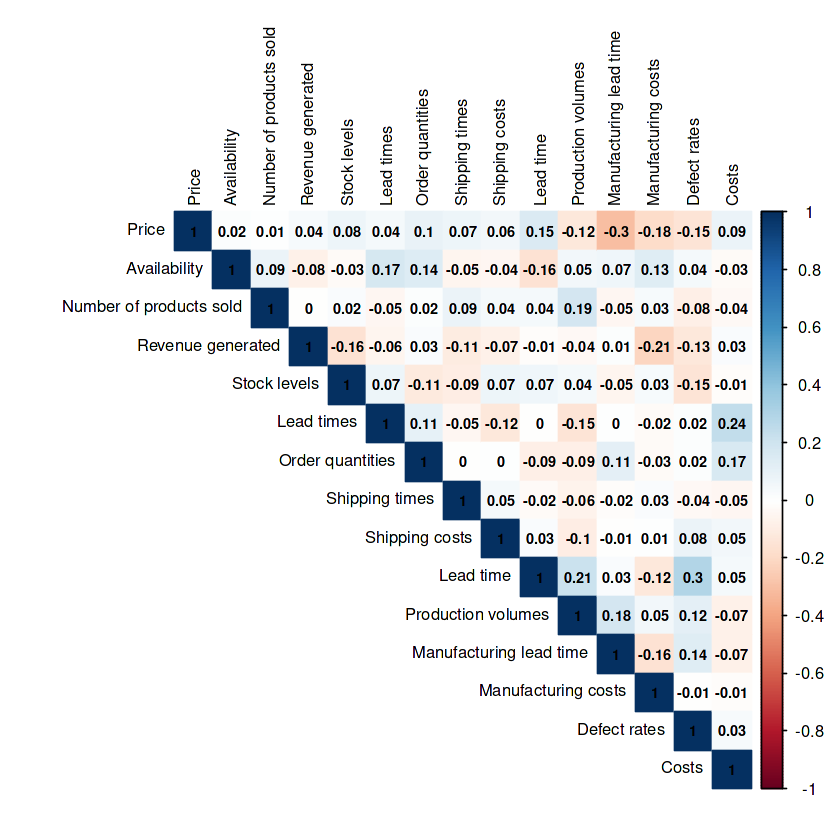

In [6]:
# Mapa de calor con coeficientes numéricos
library(corrplot)

# Matriz de correlación
num_data <- df %>% select(where(is.numeric))
cor_matrix <- cor(num_data)

# Visualización con coeficientes
corrplot(cor_matrix, method = "color", type = "upper", 
         tl.col = "black", tl.cex = 0.8, number.cex = 0.7,
         addCoef.col = "black")  # Añadir los coeficientes en negro


Correlaciones a destacar por su implicación:

Revenue generated vs. Manufacturing costs (-0.21): Esta es una correlación significativa que podría indicar que una mayor producción (que lleva a más ingresos) beneficia la eficiencia de costos de fabricación. Esto podría deberse a economías de escala o a procesos más optimizados.

Observaciones Generales:

Muchas de las correlaciones son relativamente débiles (valores cercanos a 0), lo que sugiere que no hay una relación lineal fuerte entre muchas de las variables.
Las correlaciones de "1" (como "Número de productos vendidos" con "Revenue generado" y "Manufacturing costs" con "Costs") son probablemente el resultado de cómo se definen o calculan estas variables en este conjunto de datos, más que una correlación causal independiente.
El mapa ofrece una buena visión general para identificar posibles relaciones y áreas para una investigación más profunda. Por ejemplo, la relación entre "Revenue generated" y "Manufacturing costs" podría ser un área interesante para optimizar.

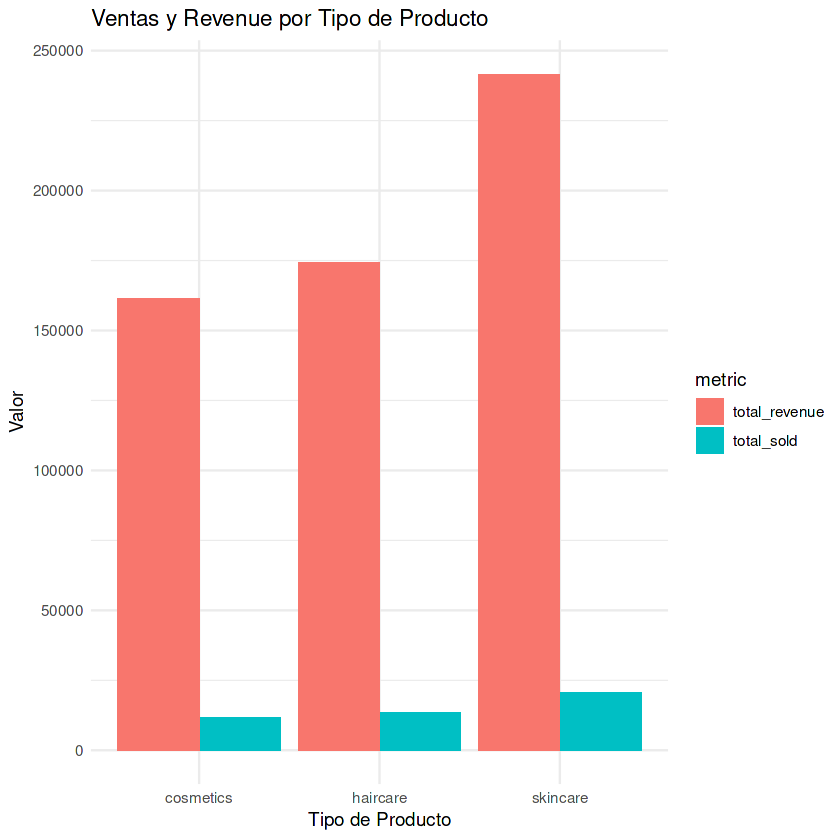

In [7]:
#Agrupación por tipo de producto
df %>%
  group_by(`Product type`) %>%
  summarise(
    total_sold = sum(`Number of products sold`),
    total_revenue = sum(`Revenue generated`)
  ) %>%
  pivot_longer(cols = c(total_sold, total_revenue), names_to = "metric", values_to = "value") %>%
  ggplot(aes(x = `Product type`, y = value, fill = metric)) +
  geom_col(position = "dodge") +
  labs(title = "Ventas y Revenue por Tipo de Producto", y = "Valor", x = "Tipo de Producto") +
  theme_minimal()


In [8]:
#KPIs por proveedor
df %>%
  group_by(`Supplier name`) %>%
  summarise(
    productos_vendidos = sum(`Number of products sold`),
    ingresos_generados = sum(`Revenue generated`),
    tasa_defectos_prom = mean(`Defect rates`),
    costo_promedio = mean(Costs),
    tiempo_prom_lead = mean(`Lead time`)
  ) %>%
  arrange(desc(ingresos_generados))

Supplier name,productos_vendidos,ingresos_generados,tasa_defectos_prom,costo_promedio,tiempo_prom_lead
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Supplier 1,11080,157529.00,1.803630,574.8511,14.77778
Supplier 2,11068,125467.42,2.362750,515.0272,18.54545
Supplier 5,8662,110343.46,2.665408,536.0227,18.05556
Supplier 3,8083,97795.98,2.465786,468.8001,20.13333
Supplier 4,7206,86468.96,2.337397,521.8104,15.22222


**Mejor proveedor general: Supplier 1**

Mayor volumen de productos vendidos.

Mayor ingreso generado.

Menor tasa de defectos → 1.80%.

Lead time aceptable (14.78 días).

Costo promedio algo elevado, pero justificado por calidad y volumen.

**Proveedor más costoso sin justificar: Supplier 5**

Peor tasa de defectos (2.67%).

Costos intermedios.

Tiempo de entrega alto.

No destaca en nada positivo → Podría evaluarse un cambio o mejora.

**Proveedor más económico: Supplier 3**

Costo promedio más bajo ($468.80).

Pero: menor ingreso, alto lead time, defectos moderados.

Útil si se quiere optimizar costos, pero no ideal si el tiempo de entrega es crítico.

**Decisión de negocio (simulada)**

Si la empresa busca optimizar calidad y rentabilidad, Supplier 1 es claramente el proveedor preferido.

Si se quisiera reducir costos, podría considerarse Supplier 3, pero debería mejorar su tiempo de entrega.

In [9]:
#Análisis por ruta de transporte
df %>%
  group_by(Routes) %>%
  summarise(
    total_envios = n(),
    productos_vendidos = sum(`Number of products sold`),
    ingresos = sum(`Revenue generated`),
    tasa_defectos = mean(`Defect rates`),
    costo_promedio = mean(Costs)
  ) %>%
  arrange(desc(ingresos))

Routes,total_envios,productos_vendidos,ingresos,tasa_defectos,costo_promedio
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Route A,43,19778,253198.9,2.341795,485.4831
Route B,37,18370,204484.0,2.322165,595.6590
Route C,20,7951,119922.0,2.054925,500.4710


**Ruta más rentable: Route A**

Mayor número de productos enviados y mayor ingreso generado.

Buena tasa de defectos (promedio).

Costo moderado → $485.48 por envío.

**Ruta más costosa: Route B**

Costo promedio más alto → $595.66 por envío.

Ingreso e impacto menores que Ruta A.

No se justifica a menos que tenga ventajas no reflejadas (ej. menor tiempo).

**Ruta con mejor calidad: Route C**

Menor tasa de defectos: 2.05%.

Menor cantidad de envíos e ingresos → posiblemente ruta secundaria o menos utilizada.

Podría ampliarse si se prioriza calidad.


**Insight estratégico (simulado)**

Si la empresa busca maximizar utilidad, Route A es la mejor opción.

Si se desea priorizar calidad del producto entregado, Route C debería ser evaluada para expansión, siempre que su cobertura lo permita.

Route B, en cambio, tiene el peor costo-beneficio: menor ingreso que A y mayor costo que todas → podría optimizarse o reemplazarse.

In [10]:
#Análisis por modo de transporte
df %>%
  group_by(`Transportation modes`) %>%
  summarise(
    total_envios = n(),
    productos_vendidos = sum(`Number of products sold`),
    ingresos = sum(`Revenue generated`),
    tasa_defectos = mean(`Defect rates`),
    costo_promedio = mean(Costs)
  ) %>%
  arrange(desc(ingresos))

Transportation modes,total_envios,productos_vendidos,ingresos,tasa_defectos,costo_promedio
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Rail,28,13493,164990.42,2.318814,541.7476
Road,29,13120,159315.23,2.620938,553.3860
Air,26,10882,155735.35,1.823924,561.7126
Sea,17,8604,97563.82,2.315281,417.8191


**AIR: Mejor calidad**

Tasa de defectos más baja → 1.82%

Alto ingreso con menos productos → Posiblemente productos premium o urgente.

Costo más alto → $561.71 por envío

Ideal cuando se requiere velocidad y calidad, aunque es costoso.

**SEA: Transporte más económico**

Costo más bajo → $417.82

Menor volumen y ganancias → Ruta menos usada o de baja prioridad

Calidad promedio

Bueno para productos no urgentes y reducción de costos.

**RAIL: Mejor balance general**

Mayor ingreso total → $164,990

Segundo mejor en volumen

Defectos y costos moderados

El más eficiente en términos de ingreso por costo.

**ROAD: Menor desempeño**

Mayor tasa de defectos → 2.62%

Costo relativamente alto ($553.39)

Ingreso inferior a Rail y Air

Este modo parece el menos eficiente. Puede ser foco de mejoras logísticas.

**Recomendacion:**

Priorizar Rail si el objetivo es balancear costo e ingreso.

Air si se necesita rapidez y calidad, pero aceptando el costo.

Revisar Road para reducir defectos y optimizar uso.

Usar Sea para cargas grandes no urgentes con enfoque en economía.